# Mapas Auto organizáveis de Kohonen

# **Vamos começar!**
Baixar no UCI Machine Learning Repository um repositório de sua escolha **.csv*. Como exemplo, na pasta /solucoes temos uma SOM para análise química de vinhos cultivados na mesma região da Itália, vamos preparar nosso ambiente com as bibliotecas necessárias e depois importaremos os dados!

## Importando as bibliotecas

In [97]:
# instalar a biblioteca <minsom> *no Anaconda Prompt digite <> pip install minisom
from minisom import MiniSom  
import pandas as pd
import numpy as np

In [98]:
base = pd.read_csv('iris.data')

### Camada de entrada e rótulos para validação

In [99]:
base.head(200)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [100]:
base["class"].values

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [101]:
base.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Transformando labels em números

In [102]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
base["class"] = lb_make.fit_transform(base["class"])

base["class"].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Carregando os dados

In [103]:
X = base.iloc[:,0:4].values
y = base.iloc[:,4].values

### Normalização dos dados

In [104]:
from sklearn.preprocessing import MinMaxScaler
normalizador = MinMaxScaler(feature_range = (0,1))
X = normalizador.fit_transform(X)

### Construção do SOM

O algoritmo de Kohonen foi desenvolvido por Teuvo Kohonen em 1982, sendo considerado relativamente simples e com a capacidade de organizar dimensionalmente dados complexos em grupos (clusters), de acordo com suas relações. Este método solicita apenas os parâmetros de entrada, mostrando-se ideal para problemas onde os padrões são desconhecidos ou indeterminados.
<a href='https://pt.wikipedia.org/wiki/Mapas_de_Kohonen#/media/Ficheiro:TrainSOM.gif'>  <img src='440px-TrainSOM.gif' /></a>


In [105]:
som = MiniSom(x = 10, y = 10, input_len = 4, sigma = 1.0, learning_rate = 0.9, random_seed = 2)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100000)

#### Topologia da Rede

Os SOMs  têm duas camadas, a primeira é a camada de entrada e a segunda é a camada de saída ou o mapa de características. Ao contrário de outros tipos de RNA, SOM não tem função de ativação em neurônios, passamos pesos diretamente para a camada de saída sem fazer nada. Cada neurônio em um SOM é atribuído a um vetor de peso com a mesma dimensionalidade d do espaço de entrada. <a href='https://towardsdatascience.com/analyzing-climate-patterns-with-self-organizing-maps-soms-8d4ef322705b'> <img src='Mapa.png'/> </a>

In [106]:
som._activation_map

array([[0.80189453, 0.74223819, 0.62646349, 0.5609645 , 0.51582195,
        0.50527555, 0.61943189, 0.55203464, 0.50428101, 0.37592286],
       [0.68739508, 0.62423178, 0.56133647, 0.4769131 , 0.46310798,
        0.48023154, 0.56909795, 0.43222396, 0.35661994, 0.31387808],
       [0.73988512, 0.64843786, 0.51392216, 0.42337371, 0.36620713,
        0.31109674, 0.3890622 , 0.30446204, 0.26515688, 0.27717809],
       [0.510687  , 0.48086872, 0.37417332, 0.32192238, 0.25803597,
        0.20907092, 0.25147731, 0.29952498, 0.40376233, 0.44159255],
       [0.40116772, 0.28126562, 0.1921342 , 0.1885418 , 0.14985316,
        0.10400754, 0.17642221, 0.62761819, 0.92440426, 0.92644656],
       [0.30195959, 0.18558061, 0.18124415, 0.28045334, 0.22144356,
        0.12099048, 0.56535145, 0.8039143 , 0.77019381, 0.88225376],
       [0.21615499, 0.16308939, 0.1637401 , 0.28330196, 0.25826868,
        0.4913233 , 0.71311332, 0.77675257, 0.83030852, 0.80695006],
       [0.09710751, 0.00426104, 0.1567441

#### Pesos do SOM

In [107]:
som._weights

array([[[0.96070961, 0.74840316, 0.9504741 , 0.85068494],
        [0.80927702, 0.66741793, 0.86624838, 0.99356198],
        [0.66743939, 0.54126604, 0.7969735 , 0.99901242],
        [0.66614707, 0.45849431, 0.77916324, 0.95662391],
        [0.69802992, 0.44216215, 0.70346665, 0.91569938],
        [0.58455735, 0.49984048, 0.72936233, 0.91656366],
        [0.55601221, 0.54153389, 0.84350206, 0.9972111 ],
        [0.49116766, 0.44749988, 0.77535529, 0.97761758],
        [0.41496054, 0.32994311, 0.69387422, 0.95087757],
        [0.38918   , 0.20928109, 0.67814373, 0.79156659]],

       [[0.94483362, 0.42018666, 0.86866804, 0.91522002],
        [0.84109536, 0.4709897 , 0.88187303, 0.89361508],
        [0.7011667 , 0.49858014, 0.82117876, 0.91622498],
        [0.61292065, 0.41678313, 0.81232706, 0.87478142],
        [0.71265109, 0.44610202, 0.75113474, 0.83403501],
        [0.66017571, 0.5326984 , 0.79311971, 0.82936337],
        [0.55103161, 0.58181722, 0.77195209, 0.94674636],
        [0.4

## Visualizção dos Dados

### Visualização de quantas vezes determinado neurônio foi ativado

**Competição:**
Como dissemos antes, a cada neurônio em um SOM é atribuído um vetor de peso com a mesma dimensionalidade do espaço de entrada.
No exemplo abaixo, em cada neurônio da camada de saída teremos um vetor com dimensão n.
Calculamos a distância entre cada neurônio (neurônio da camada de saída) e os dados de entrada, e o neurônio com a menor distância será o vencedor da competição. 

A métrica euclidiana ***dj*** é comumente usada para medir distâncias: $$\ d_j =\sum_{i=1}^n(x_i-w_{ij})^2$$

<a href=https://towardsdatascience.com/self-organizing-maps-1b7d2a84e065> <img src='competicao.png'/> </a>


In [108]:
q = som.activation_response(X)
q

array([[2., 1., 1., 1., 2., 1., 1., 0., 1., 1.],
       [1., 0., 2., 1., 2., 1., 2., 0., 1., 2.],
       [1., 2., 1., 2., 1., 3., 1., 1., 2., 1.],
       [2., 1., 1., 2., 2., 0., 2., 1., 0., 0.],
       [1., 1., 1., 1., 1., 3., 1., 0., 2., 1.],
       [2., 2., 1., 2., 1., 1., 0., 2., 1., 1.],
       [3., 1., 2., 1., 1., 0., 3., 2., 2., 2.],
       [2., 1., 1., 1., 2., 0., 1., 3., 3., 3.],
       [3., 1., 3., 1., 3., 0., 1., 2., 3., 1.],
       [2., 1., 1., 2., 1., 1., 3., 5., 6., 2.]])


### MID - distância média entre neurônios

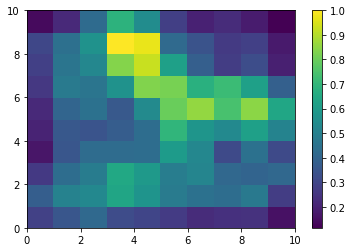

In [109]:
from matplotlib.pylab import pcolor, colorbar, plot, plt
pcolor(som.distance_map().T)
# MID - mean inter neuron distance
colorbar()

### Regiões de ativação (classe)

In [110]:
markers = ['o', 's', 'D']
color = ['r', 'g', 'b']
y[y == 0] = 0
y[y == 1] = 1
y[y == 2] = 2


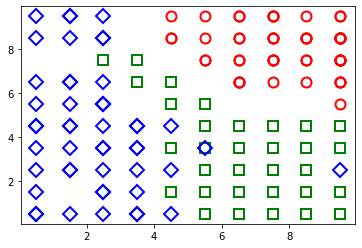

In [111]:
for i, x in enumerate(X):
    #print(i)
    #print(x)
    w = som.winner(x)
    #print(w)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
         markerfacecolor = 'None', markersize = 10,
         markeredgecolor = color[y[i]], markeredgewidth = 2)

In [114]:
w = som.winner(X[148])  
print(w)

(1, 6)


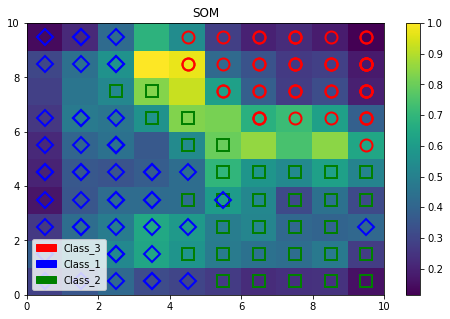

In [113]:
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Class_3')
blue_patch = mpatches.Patch(color='blue', label='Class_1')
green_patch = mpatches.Patch(color='green', label='Class_2')


plt.figure(figsize=(8,5))
plt.title('SOM')
plt.pcolor(som.distance_map().T) # Mapa de distância como background
plt.colorbar()

for cnt,xx in enumerate(X):
    w = som.winner(xx) # Definindo o neurônio
    plt.plot(w[0]+.5,w[1]+.5,markers[y[cnt]],markerfacecolor='None',
             markeredgecolor=color[y[cnt]],markersize=12,markeredgewidth=2)
    
plt.axis([0,som.get_weights().shape[0],0,som.get_weights().shape[1]])
plt.legend(handles=[red_patch, blue_patch,green_patch])
plt.show() 